In [ ]:
# Options data for SPX, source : optionsdx.com 

In [ ]:
# Working Directory - /Users/pranav/Desktop/SU/AML_Project/

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
file_path = 'C:/Users/reach/Desktop/amlproj/merged_filtered_dataset.csv'

In [10]:
merged_filtered_df = pd.read_csv(file_path)

In [11]:
merged_filtered_df.head()

,Unnamed: 0,Spot_Price,STRIKE,DTE,DTB3,C_IV,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_VOLUME,C_LAST,C_BID,C_ASK,QUOTE_DATE,EXPIRE_DATE,BS_Call_Price
0,13,3852.969971,3150.0,7.0,4.41,0.57042,0.99218,0.00001,0.10585,-0.34615,0.65023,,0.00,702.3,706.2,2023-01-04,2023-01-11,706.088627
1,33,3852.969971,3635.0,7.0,4.41,0.00111,0.99962,0.00000,0.00000,-0.62809,0.76886,,0.00,216.9,220.2,2023-01-04,2023-01-11,221.042985
2,38,3852.969971,3660.0,7.0,4.41,0.00062,1.00000,0.00000,6.53584,0.00000,0.00000,1.000000,209.72,192.0,195.4,2023-01-04,2023-01-11,196.064120
3,39,3852.969971,3665.0,7.0,4.41,0.00069,0.99941,0.00000,0.00000,-0.08519,0.77470,,0.00,187.1,190.5,2023-01-04,2023-01-11,191.068347
4,40,3852.969971,3670.0,7.0,4.41,0.00067,1.00000,0.00000,6.63585,0.00000,0.00000,,0.00,182.3,185.7,2023-01-04,2023-01-11,186.072574


In [15]:
merged_filtered_df['QUOTE_DATE'] = pd.to_datetime(merged_filtered_df['QUOTE_DATE'])



In [16]:
merged_filtered_df.tail()

,Unnamed: 0,Spot_Price,STRIKE,DTE,DTB3,C_IV,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_VOLUME,C_LAST,C_BID,C_ASK,QUOTE_DATE,EXPIRE_DATE,BS_Call_Price
37105,39388,4117.370117,5000.0,7.0,5.32,0.39436,0.00017,0.00001,0.00902,-0.01624,0.00076,0.000000,0.05,0.0,0.05,2023-10-27,2023-11-03,0.012456
37106,39389,4117.370117,5200.0,7.0,5.32,0.46692,0.00063,0.00000,0.00776,-0.01677,-0.00002,0.000000,0.05,0.0,0.05,2023-10-27,2023-11-03,0.011956
37107,39390,4117.370117,5400.0,7.0,5.32,0.53645,0.00004,0.00000,0.00687,-0.01643,-0.00017,0.000000,0.05,0.0,0.05,2023-10-27,2023-11-03,0.011785
37108,39391,4117.370117,5600.0,7.0,5.32,0.60312,0.00018,0.00000,0.00628,-0.01685,0.00058,,0.00,0.0,0.05,2023-10-27,2023-11-03,0.011756
37109,39392,4117.370117,5800.0,7.0,5.32,0.66641,0.00068,0.00000,0.00589,-0.01722,0.00008,,0.00,0.0,0.05,2023-10-27,2023-11-03,0.011590


In [17]:
merged_filtered_df.isnull().sum()

Unnamed: 0       0
Spot_Price       0
STRIKE           0
DTE              0
DTB3             0
C_IV             0
C_DELTA          0
C_GAMMA          0
C_VEGA           0
C_THETA          0
C_RHO            0
C_VOLUME         0
C_LAST           0
C_BID            0
C_ASK            0
QUOTE_DATE       0
EXPIRE_DATE      0
BS_Call_Price    0
dtype: int64

In [18]:
merged_filtered_df.columns

Index(['Unnamed: 0', 'Spot_Price', 'STRIKE', 'DTE', 'DTB3', 'C_IV', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_VOLUME', 'C_LAST', 'C_BID',
       'C_ASK', 'QUOTE_DATE', 'EXPIRE_DATE', 'BS_Call_Price'],
      dtype='object')

In [25]:
del merged_filtered_df['BS_Call_Price']

In [26]:
merged_filtered_df.isnull().sum()

Unnamed: 0     0
Spot_Price     0
STRIKE         0
DTE            0
DTB3           0
C_IV           0
C_DELTA        0
C_GAMMA        0
C_VEGA         0
C_THETA        0
C_RHO          0
C_VOLUME       0
C_LAST         0
C_BID          0
C_ASK          0
QUOTE_DATE     0
EXPIRE_DATE    0
dtype: int64

In [71]:
from scipy.stats import norm
import numpy as np

# Ensure the relevant columns are in numeric format
merged_filtered_df['Spot_Price'] = pd.to_numeric(merged_filtered_df['Spot_Price'])
merged_filtered_df['STRIKE'] = pd.to_numeric(merged_filtered_df['STRIKE'])
merged_filtered_df['DTE'] = pd.to_numeric(merged_filtered_df['DTE'])
merged_filtered_df['DTB3'] = pd.to_numeric(merged_filtered_df['DTB3'])
merged_filtered_df['C_IV'] = pd.to_numeric(merged_filtered_df['C_IV'])

# Function to calculate the Black-Scholes option price for calls
def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes option price for a call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2 ) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    option_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return option_price

# Add a new column to the DataFrame for the Black-Scholes price
merged_filtered_df['BS_Call_Price'] = merged_filtered_df.apply(
    lambda row: black_scholes_call(
        S=row['Spot_Price'], 
        K=row['STRIKE'], 
        T=row['DTE']/251, 
        r=row['DTB3']/100,  # Ensure the risk-free rate is in decimal form
        sigma=row['C_IV']
    ), axis=1
)

C:\Users\reach\AppData\Local\Temp\ipykernel_22688\4245304129.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2 ) * T) / (sigma * np.sqrt(T))


In [72]:
len(merged_filtered_df)

37110

In [73]:
merged_filtered_df.isnull().sum()

Unnamed: 0              0
Spot_Price              0
STRIKE                  0
DTE                     0
DTB3                    0
C_IV                    0
C_DELTA                 0
C_GAMMA                 0
C_VEGA                  0
C_THETA                 0
C_RHO                   0
C_VOLUME                0
C_LAST                  0
C_BID                   0
C_ASK                   0
QUOTE_DATE              0
EXPIRE_DATE             0
BS_Call_Price           0
C_IV_scaled             0
BS_Call_Price_scaled    0
Difference              0
dtype: int64

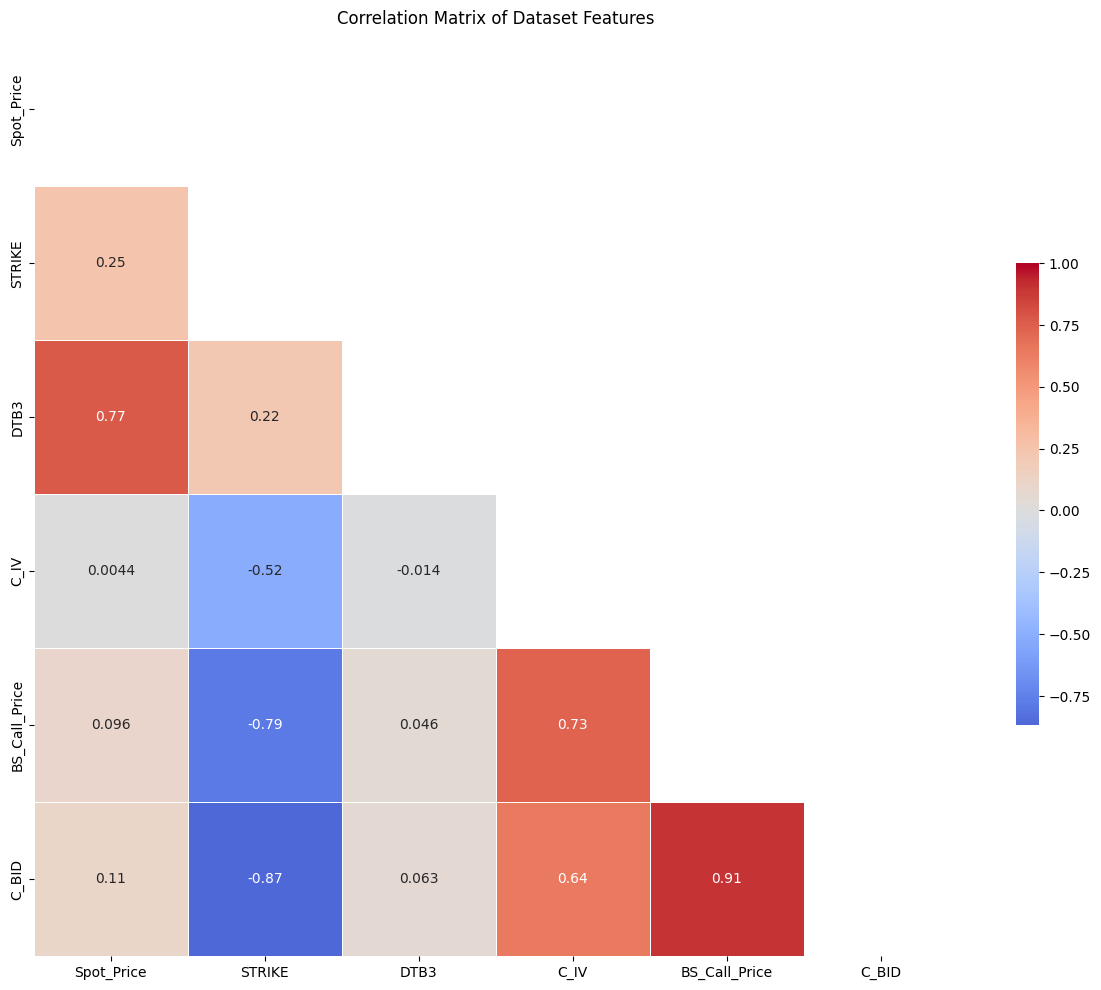

In [106]:

df = merged_filtered_df[['Spot_Price', 'STRIKE', 'DTB3', 'C_IV', 'BS_Call_Price','C_BID']]


df = df.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Dataset Features')
plt.show()





The correlation matrix depicted reveals various degrees of linear association between pairs of features in the dataset:

- `Spot_Price` and `DTB3` exhibit a significant positive correlation of 0.77, indicating that as the spot price of the underlying asset increases, the risk-free rate (DTB3) tends to also increase, which may suggest that higher spot prices are associated with rising interest rates or economic conditions that lead to higher rates.

- A strong negative correlation of -0.79 is observed between `STRIKE` and `BS_Call_Price`, suggesting that as the strike price increases, the Black-Scholes model predicts a lower price for the call option, which is consistent with financial theory.

- The `C_IV` (implied volatility of call options) shows a substantial positive correlation of 0.91 with `C_BID`, implying that the bid price of call options tends to rise with increasing implied volatility, a relationship that aligns with the options pricing theory where higher volatility typically increases option premiums.

- Interestingly, `C_IV` has a moderate negative correlation with `STRIKE` (-0.52), indicating that options with higher strike prices may have lower implied volatility in this particular dataset.

- `BS_Call_Price` also has a strong positive correlation of 0.73 with `C_BID`, indicating that the model-predicted call prices align well with the bid prices in the market, which could suggest the model is effective at capturing market prices under certain conditions.

- `Spot_Price` and `STRIKE` show a mild positive correlation of 0.25, hinting at a slight tendency for options with higher strike prices to be associated with higher spot prices of the underlying asset.

- The other correlations involving `Spot_Price`, `BS_Call_Price`, and `C_BID` with `DTB3` are relatively lower, indicating weaker linear relationships with the risk-free interest rate.

Overall, the strongest insights from this correlation matrix are the expected inverse relationship between strike price and call option price, and the strong linkage between implied volatility and option bid prices. The positive relationship between spot price and risk-free rate could reflect specific market or dataset conditions and warrants further investigation to understand the underlying dynamics.

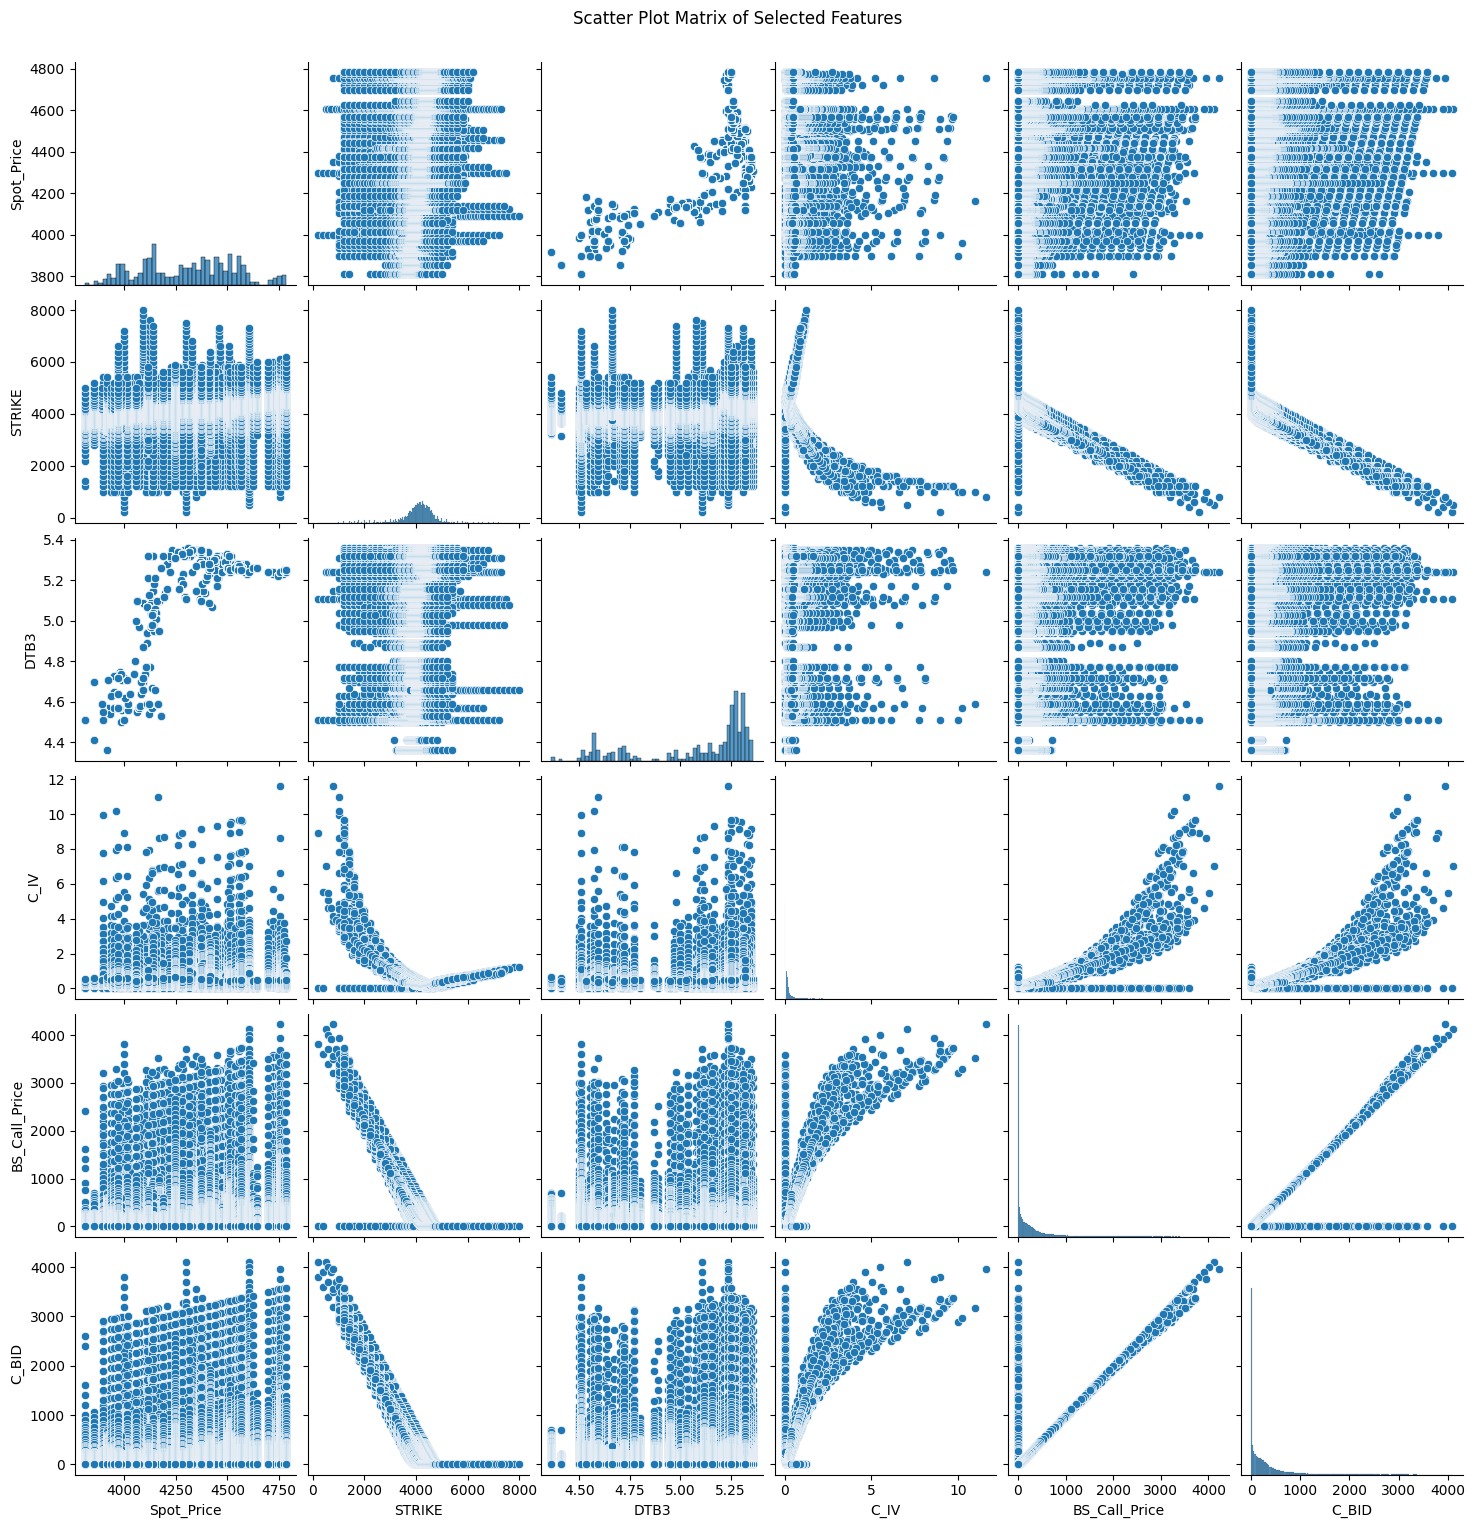

In [107]:
# Generate a pairplot
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)  # Adjust title positioning
plt.show()


- The `Spot_Price` with `STRIKE` scatter plot doesn't depict a clear linear relationship, which corresponds with the mild correlation seen in the earlier correlation matrix. which makes sense as here appear to be a wide range of strikes for any given spot price.

- There is a notable pattern between `Spot_Price` and `DTB3` which shows clustering at certain levels of `DTB3`, indicating that the risk-free rate has discrete values rather than a continuous range across different spot prices.

- The `Spot_Price` versus `C_IV` (Implied Volatility) scatter plot displays a funnel-like pattern, with a wide range of implied volatilities associated with lower spot prices, and a narrower range at higher spot prices. This could suggest volatility smile effects or a higher uncertainty in pricing for lower-priced assets.

- The `STRIKE` with `C_IV` plot also shows a pattern resembling a volatility skew, where higher strikes correspond to lower implied volatilities, which is typical in options markets.

- Both `Spot_Price` and `STRIKE` against `BS_Call_Price` display a downward sloping trend, indicating that call option prices decrease as strike prices increase, which is consistent with option pricing theory. Moreover, higher spot prices tend to be associated with higher call option prices.

- When looking at `C_IV` against `BS_Call_Price` and `C_BID`, there's a clear positive trend, reinforcing the correlation results that suggest implied volatility is positively related to option prices. Higher implied volatility often leads to higher option premiums, as seen in these plots.

- The `BS_Call_Price` versus `C_BID` scatter shows a tight, positive linear relationship, meaning the bid prices and Black-Scholes model prices for call options move closely together, which is expected since the bid price is often a reflection of the theoretical price.

These visual patterns confirm the numerical correlations and provide a deeper understanding of how each pair of variables interacts. The scatter plots are instrumental in identifying the nature of relationships—whether linear, curvilinear, or more complex—between the variables.

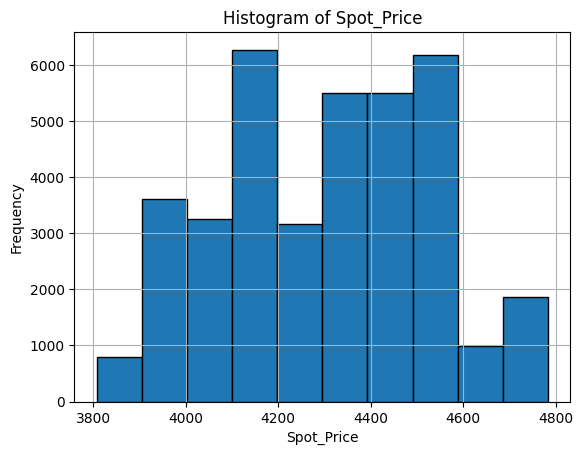

In [84]:
column_name = 'Spot_Price'  

merged_filtered_df[column_name].hist(bins=10, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

Distribution of spot price. The current price of the underlying asset. It's a primary driver of an option's price and an essential feature in any options pricing model.

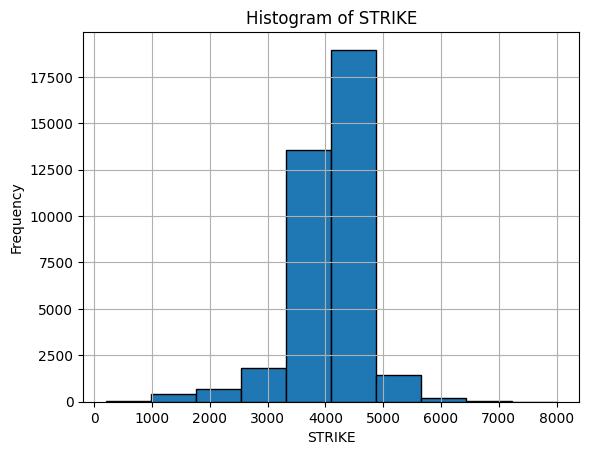

In [88]:
column_name = 'STRIKE'  
merged_filtered_df[column_name].hist(bins=10, edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

Distribution of the strike price of the SPX. The strike price of the option. It's the price at which the option can be exercised. 

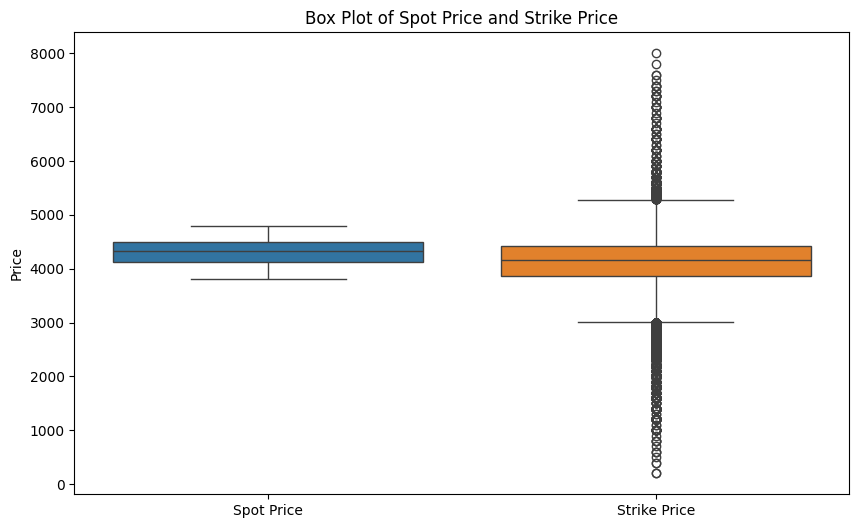

In [87]:
import seaborn as sns

price_comparison_df = merged_filtered_df[['Spot_Price', 'STRIKE']]

# Rename the columns for the boxplot legend
price_comparison_df.columns = ['Spot Price', 'Strike Price']

# Create a box plot for the Spot Price and Strike Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_comparison_df)
plt.title('Box Plot of Spot Price and Strike Price')
plt.ylabel('Price')
plt.show()


The range of Strike Prices is broader than that of Spot Prices, which could be due to the various strike prices available across multiple option contracts with different expiration dates.

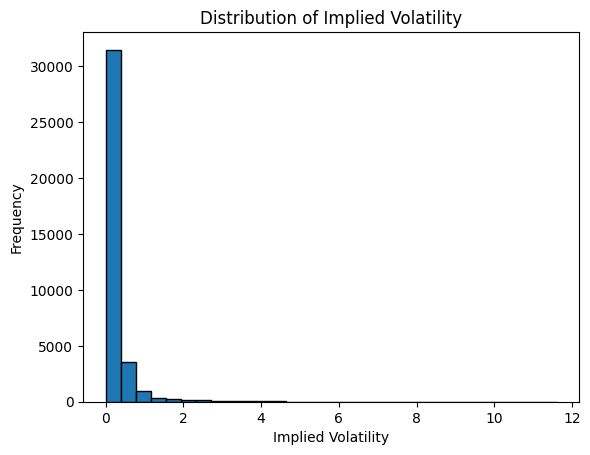

In [95]:
# Histogram of Implied Volatility
plt.hist(merged_filtered_df['C_IV'], bins=30, edgecolor='k')
plt.title('Distribution of Implied Volatility')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()

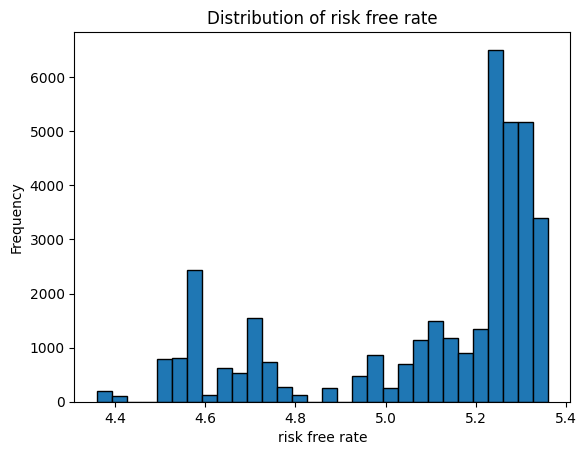

In [77]:
plt.hist(merged_filtered_df['DTB3'], bins=30, edgecolor='k')
plt.title('Distribution of risk free rate')
plt.xlabel('risk free rate')
plt.ylabel('Frequency')
plt.show()

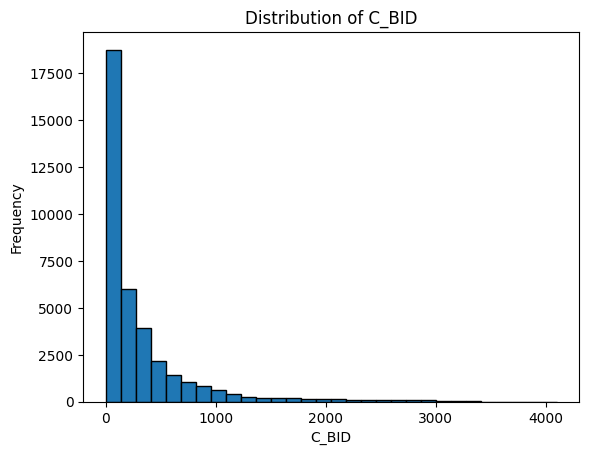

In [78]:
plt.hist(merged_filtered_df['C_BID'], bins=30, edgecolor='k')
plt.title('Distribution of C_BID')
plt.xlabel('C_BID')
plt.ylabel('Frequency')
plt.show()

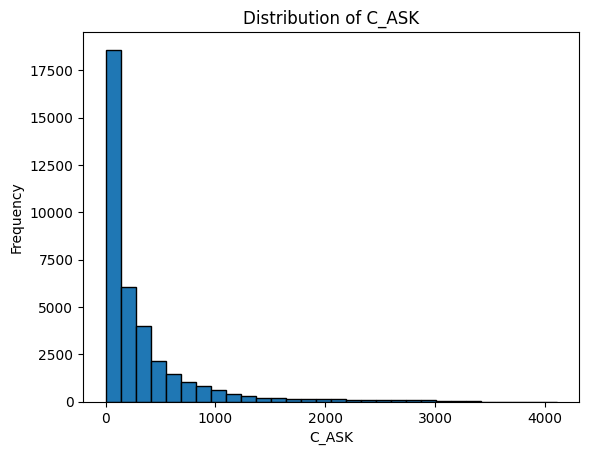

In [79]:
plt.hist(merged_filtered_df['C_ASK'], bins=30, edgecolor='k')
plt.title('Distribution of C_ASK')
plt.xlabel('C_ASK')
plt.ylabel('Frequency')
plt.show()

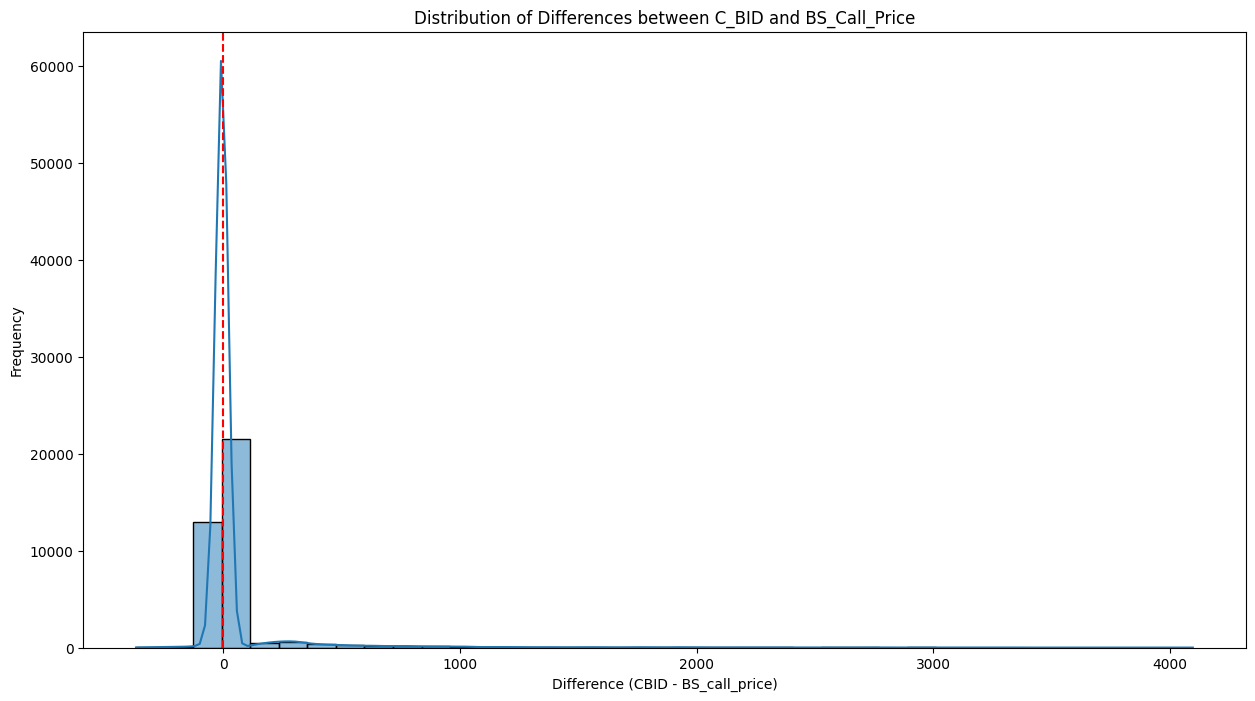

In [108]:

import seaborn as sns


# Calculating the difference between the two columns
merged_filtered_df['Difference'] = merged_filtered_df['C_BID'] - merged_filtered_df['BS_Call_Price']

# Plotting the distribution of differences
plt.figure(figsize=(15, 8))
sns.histplot(merged_filtered_df['Difference'], kde=True, bins=37)
plt.title('Distribution of Differences between C_BID and BS_Call_Price')
plt.xlabel('Difference (CBID - BS_call_price)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  # Adds a vertical line at difference = 0 for reference
plt.show()


majority of the data is close to 0 when we calculated the difference suggesting a better match overall between market and model prices.
A shorter right tail in the histogram suggests that fewer options have large discrepancies between the bid and model prices.

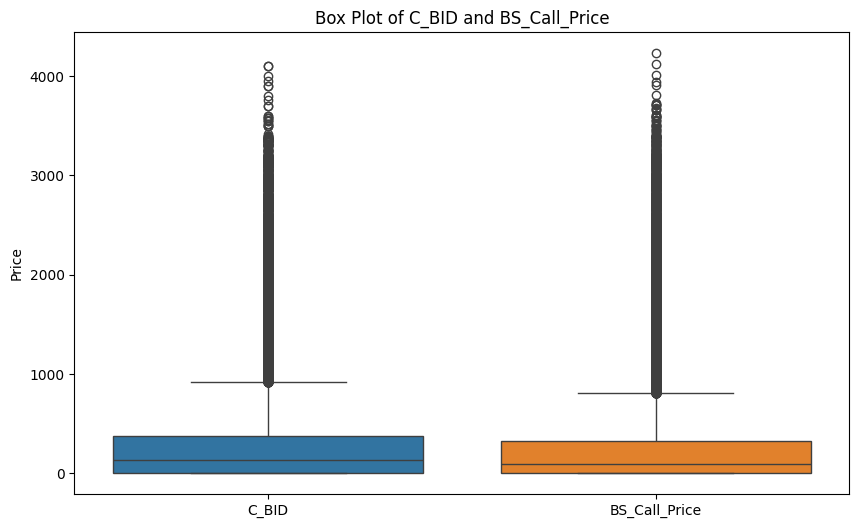

In [92]:

import seaborn as sns

price_comparison_2_df = merged_filtered_df[['C_BID', 'BS_Call_Price']]

# Rename the columns for the boxplot legend
price_comparison_2_df.columns = ['C_BID', 'BS_Call_Price']

# Create a box plot for the Spot Price and Strike Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_comparison_2_df)
plt.title('Box Plot of C_BID and BS_Call_Price')
plt.ylabel('Price')
plt.show()


1)The median line of BS_Call_Price is lower than that of C_BID, it suggests that the model, on average, prices the options lower than the market is willing to pay.


2)BS_Call_Price tends to be lower than C_BID, the model might systematically underestimate the price.

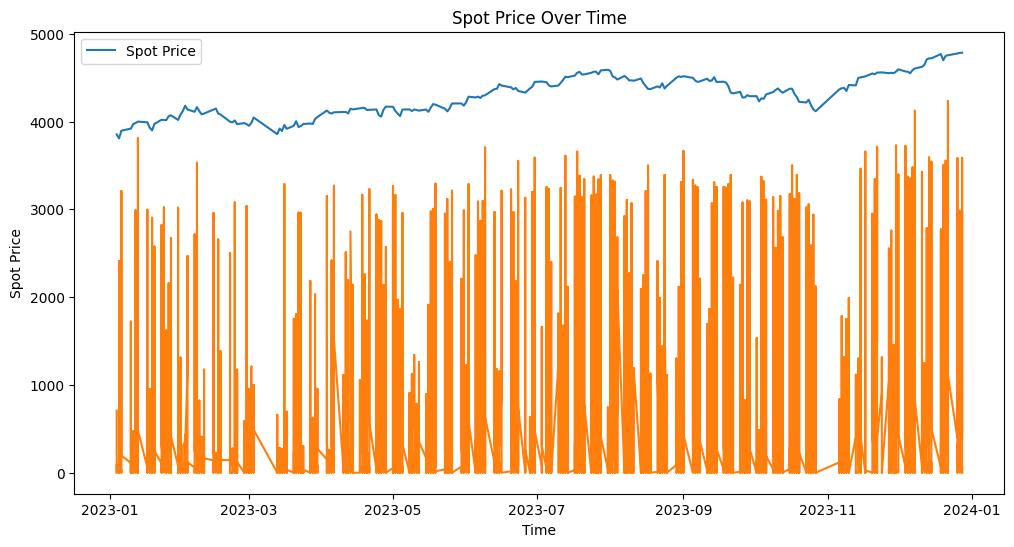

In [114]:
# Sort the DataFrame based on the time column
data = merged_filtered_df.sort_values('QUOTE_DATE')

# Plotting spot price over time
plt.figure(figsize=(12, 6))
plt.plot(data['QUOTE_DATE'], data['Spot_Price'], label='Spot Price')
plt.title('Spot Price Over Time')
plt.xlabel('Time')
plt.ylabel('Spot Price')
plt.legend()
plt.show()


***1. Feature Selection with Recursive Feature Elimination (RFE)***

Using RFE with cross-validation (RFECV) to identify which features contribute the most to predicting your target variable. RFECV will train the model multiple times, each time removing the least important feature, and cross-validate the results to find the optimal number of features.

In [168]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features including Black-Scholes price
features = ['Spot_Price', 'STRIKE', 'DTE', 'DTB3', 'C_IV', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'BS_Call_Price']
target = 'C_DELTA'  # Target remains the mid-point between bid and ask

# Prepare the features and target
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model for feature selection
model_for_selection = GradientBoostingRegressor(random_state=42)

# Initialize RFECV
selector = RFECV(estimator=model_for_selection, step=1, cv=15, scoring='neg_mean_squared_error')

# Fit RFECV
selector.fit(X_train, y_train)

# Get the mask of selected features and rankings
selected_features_mask = selector.support_
feature_rankings = selector.ranking_

# Print the features selected by RFECV and their rankings
selected_features = [feature for feature, is_selected in zip(features, selected_features_mask) if is_selected]
print("Selected features:", selected_features)

rankings = {feature: rank for feature, rank in zip(features, feature_rankings)}
print("Feature rankings:", rankings)


Selected features: ['Spot_Price', 'STRIKE', 'DTB3', 'C_IV', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'BS_Call_Price']
Feature rankings: {'Spot_Price': 1, 'STRIKE': 1, 'DTE': 2, 'DTB3': 1, 'C_IV': 1, 'C_GAMMA': 1, 'C_VEGA': 1, 'C_THETA': 1, 'C_RHO': 1, 'BS_Call_Price': 1}


Mean Squared Error: 0.002588383456126095
R^2 Score: 0.9844934488919241


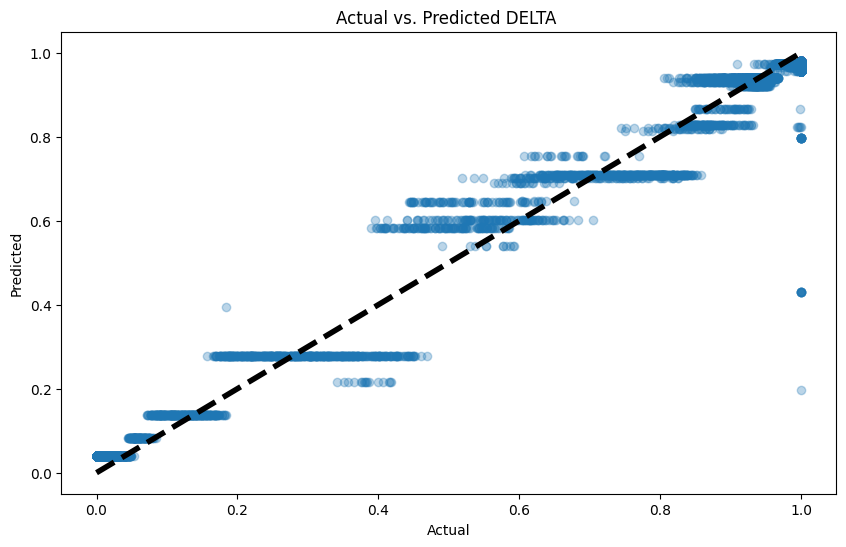

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = data

# Calculate the mid-price between bid and ask as the target variable
df['C_MID'] = (df['C_BID'] + df['C_ASK']) / 2

# Define the features including Black-Scholes price
features = ['Spot_Price', 'STRIKE', 'DTB3', 'C_IV', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'BS_Call_Price']
target = 'C_DELTA'  # Target remains the mid-point between bid and ask

# Prepare the features and target
X = df[features]
y = df[target]

# Split the dataset into training and testing sets while keeping the indices
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to retain DataFrame operations
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Initialize the model
model = GradientBoostingRegressor(n_estimators=5, learning_rate=0.5, max_depth=2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the true vs predicted values for visual evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted DELTA ')
plt.show()


RESIDUAL PLOT


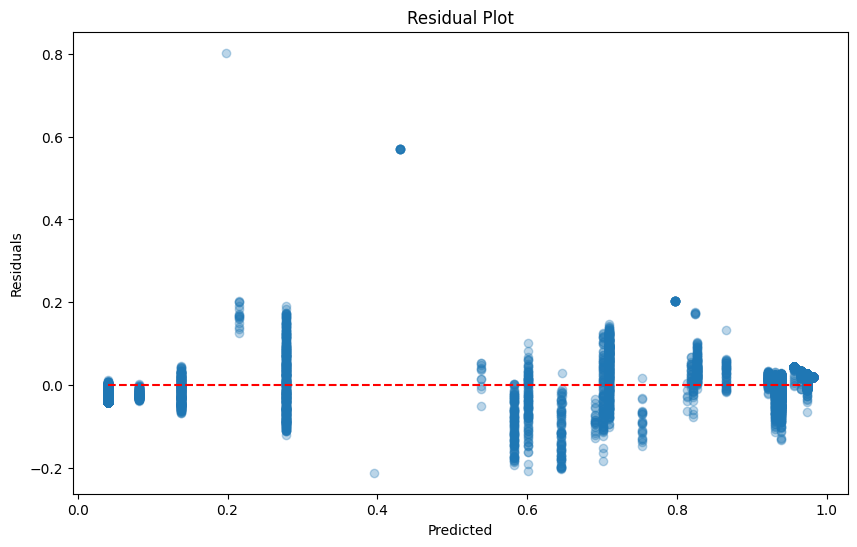

In [163]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


HISTOGRAM OF PREDICTION ERRORS

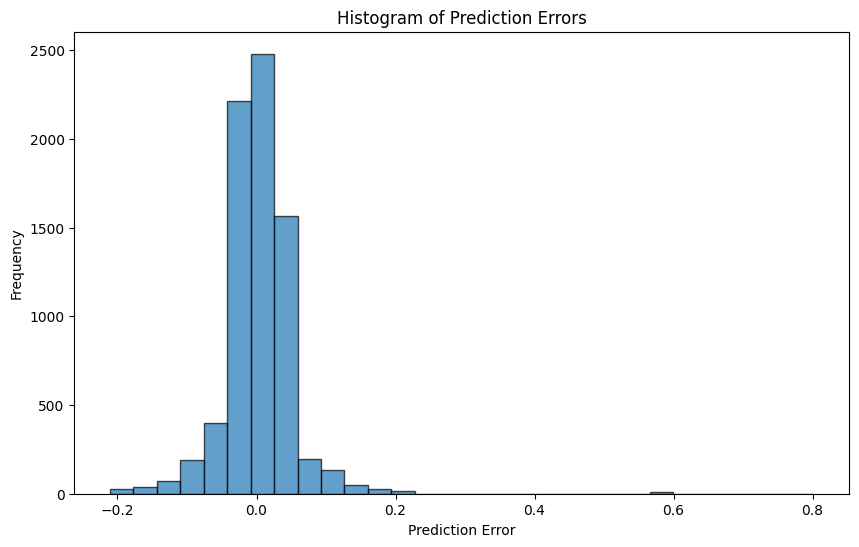

In [164]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


Q-Q PLOT

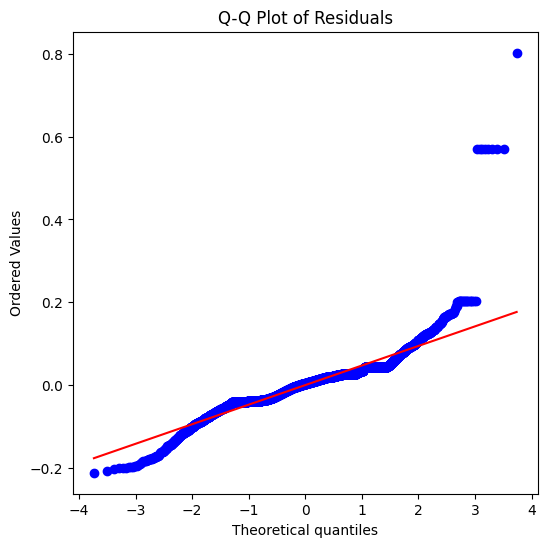

In [165]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


PREDICTION ERRORS VS VRIABLES

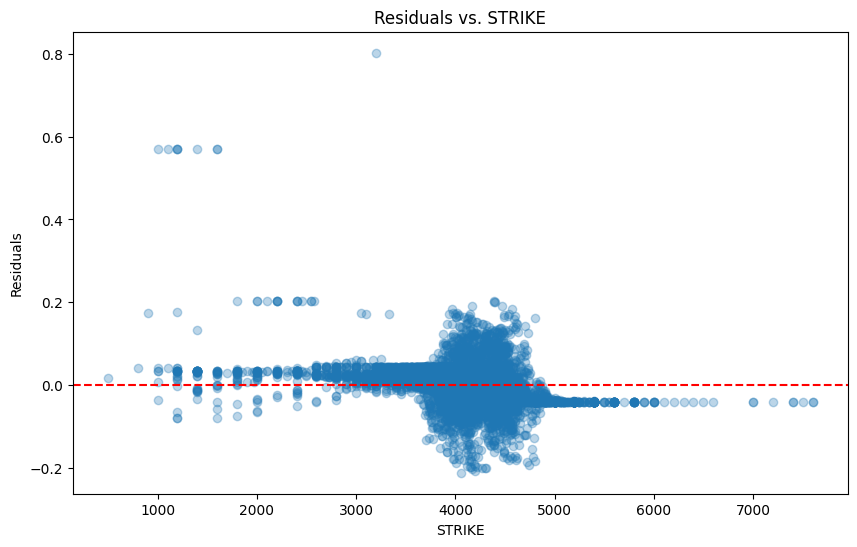

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(df['STRIKE'][X_test.index], residuals, alpha=0.3)
plt.xlabel('STRIKE')
plt.ylabel('Residuals')
plt.title('Residuals vs. STRIKE')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()




LEARNING CURVES

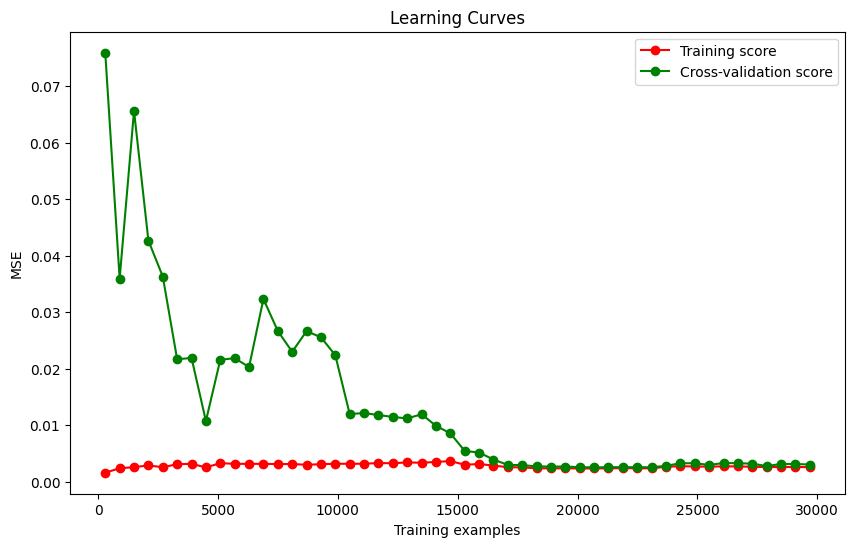

In [167]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()
